In [1]:
from ultralytics import YOLO
import cv2
# Load a model
model = YOLO("yolo11n-pose.pt")  # load an official model
tracker_model = YOLO("Player-Detection-YOLOv11X-2024-12.pt")

In [2]:
video_path = "video0.mkv"
cap = cv2.VideoCapture(video_path)

cpt=0
step=0
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    step+=1
        
    if success and step%300==0:
        cpt+=1
        
        cv2.imwrite("data/input/frame_{}.jpg".format(step), frame)
        print(f"Frame {step} enregistrée")

    if not(success) :
        break

print(f"Frame {step} enregistrée")
# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Frame 300 enregistrée
Frame 600 enregistrée
Frame 900 enregistrée
Frame 1200 enregistrée
Frame 1500 enregistrée
Frame 1800 enregistrée
Frame 2100 enregistrée
Frame 2400 enregistrée
Frame 2700 enregistrée
Frame 3000 enregistrée
Frame 3300 enregistrée
Frame 3600 enregistrée
Frame 3900 enregistrée
Frame 4200 enregistrée
Frame 4500 enregistrée
Frame 4800 enregistrée
Frame 5100 enregistrée
Frame 5400 enregistrée
Frame 5700 enregistrée
Frame 6000 enregistrée
Frame 6300 enregistrée
Frame 6600 enregistrée
Frame 6900 enregistrée
Frame 7200 enregistrée
Frame 7500 enregistrée
Frame 7800 enregistrée
Frame 8100 enregistrée
Frame 8400 enregistrée
Frame 8700 enregistrée
Frame 9000 enregistrée
Frame 9300 enregistrée
Frame 9600 enregistrée
Frame 9900 enregistrée
Frame 10200 enregistrée
Frame 10500 enregistrée
Frame 10800 enregistrée
Frame 11100 enregistrée
Frame 11400 enregistrée
Frame 11700 enregistrée
Frame 12000 enregistrée
Frame 12300 enregistrée
Frame 12600 enregistrée
Frame 12900 enregistrée
Fram

In [2]:
import os
from PIL import Image
from shutil import move, rmtree

class Cropping:
    def __init__(self, input_dir, output_dir):
        """
        Initialize the cropping class.

        Args:
            input_dir (str): Path to the input directory containing 'images' and 'labels'.
            output_dir (str): Path to the output directory to save cropped images and labels.
        """
        self.input_images_dir = os.path.join(input_dir, "images")
        self.input_labels_dir = os.path.join(input_dir, "labels")
        self.output_images_dir = os.path.join(output_dir, "images")
        self.output_labels_dir = os.path.join(output_dir, "labels")

        # Create output directories if they don't exist
        os.makedirs(self.output_images_dir, exist_ok=True)
        os.makedirs(self.output_labels_dir, exist_ok=True)

    def crop_image(self, image_path, boxes):
        """
        Crop an image based on the provided bounding boxes.

        Args:
            image_path (str): Path to the input image.
            boxes (list): List of bounding boxes in YOLO format [x_center, y_center, width, height].

        Returns:
            list: A list of cropped images.
        """
        image = Image.open(image_path)
        image_width, image_height = image.size
        cropped_images = []

        for box in boxes:
            x_center, y_center, width, height = box

            # Convert YOLO format to pixel format
            x1 = int((x_center - width / 2) * image_width)
            y1 = int((y_center - height / 2) * image_height)
            x2 = int((x_center + width / 2) * image_width)
            y2 = int((y_center + height / 2) * image_height)

            # Crop the image
            offset = 15
            cropped = image.crop((x1-offset, y1-offset, x2+offset, y2+offset))
            cropped_images.append(cropped)

        return cropped_images

    def parse_label_file(self, label_path):
        """
        Parse a YOLO label file to extract bounding box information.

        Args:
            label_path (str): Path to the label file.

        Returns:
            list: A list of bounding boxes (class_id, x_center, y_center, width, height).
        """
        boxes = []
        with open(label_path, "r") as file:
            for line in file:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                boxes.append((class_id, x_center, y_center, width, height))
        return boxes

    def save_cropped_data(self, cropped_images, boxes, image_name):
        """
        Save cropped images and their corresponding labels.

        Args:
            cropped_images (list): List of cropped images.
            boxes (list): List of bounding boxes (class_id, x_center, y_center, width, height).
            image_name (str): Name of the original image.
        """
        for i, (cropped_image, box) in enumerate(zip(cropped_images, boxes)):
            class_id, _, _, _, _ = box

            # Save cropped image
            cropped_image_name = f"{os.path.splitext(image_name)[0]}_crop_{i}.jpg"
            cropped_image_path = os.path.join(self.output_images_dir, cropped_image_name)
            cropped_image.save(cropped_image_path)

            # Save label
            cropped_label_name = f"{os.path.splitext(image_name)[0]}_crop_{i}.txt"
            cropped_label_path = os.path.join(self.output_labels_dir, cropped_label_name)
            with open(cropped_label_path, "w") as label_file:
                label_file.write(f"{class_id} 0.5 0.5 1.0 1.0\n")

    def process_dataset(self):
        """
        Process the dataset: crop images based on labels and save the results.
        """
        for image_file in os.listdir(self.input_images_dir):
            image_path = os.path.join(self.input_images_dir, image_file)
            label_path = os.path.join(self.input_labels_dir, os.path.splitext(image_file)[0] + ".txt")

            if not os.path.exists(label_path):
                print(f"Warning: Label file not found for {image_file}. Skipping...")
                continue

            # Parse label file
            boxes = self.parse_label_file(label_path)

            # Crop the image
            cropped_images = self.crop_image(image_path, [box[1:] for box in boxes])

            # Save cropped images and labels
            self.save_cropped_data(cropped_images, boxes, image_file)

        print(f"Cropping completed. Cropped data saved in {os.path.dirname(self.output_images_dir)}")


class PredictAndCrop:
    def __init__(self, config):
        """
        Initialize the Predict class with configuration parameters.

        Args:
            config (dict): Configuration dictionary containing paths and model information.
        """
        self.input_dir = config["input_dir"]
        self.cropped_dir = config["cropped_dir"]
        self.output_dir = config["output_dir"]

        os.makedirs(self.cropped_dir, exist_ok=True)
        os.makedirs(self.output_dir, exist_ok=True)

        # Load models
        self.player_tracker_model = YOLO("Player-Detection-YOLOv11X-2024-12.pt")

    def predict_player_tracking(self):
        """
        Detect players in images.
        """
        images_dir = os.path.join(self.input_dir, "images")
        labels_dir = os.path.join(self.input_dir, "labels")
        os.makedirs(labels_dir, exist_ok=True)

        # Specify the output directory for the predictions
        results = self.player_tracker_model.predict(
            source=images_dir,
            save_txt=True,
            save_conf=False,
            project=self.input_dir,  # Save in the input directory
            name="player_tracking_predictions"  # Subdirectory for predictions
        )

        # Move labels to the expected folder
        predictions_dir = os.path.join(self.input_dir, "player_tracking_predictions", "labels")
        if os.path.exists(predictions_dir):
            for label_file in os.listdir(predictions_dir):
                move(os.path.join(predictions_dir, label_file), os.path.join(labels_dir, label_file))
            rmtree(os.path.join(self.input_dir, "player_tracking_predictions"), ignore_errors=True)

        print(f"Players predictions completed. Labels saved in {labels_dir}.")



    def predict_digit(self):
        """
        Predict digits from cropped water meter images.
        """
        cropped_images_dir = os.path.join(self.cropped_dir, "images")
        labels_dir = os.path.join(self.cropped_dir, "labels")
        output_labels_dir = os.path.join(self.output_dir, "labels")
        output_images_dir = os.path.join(self.output_dir, "images")
        os.makedirs(output_labels_dir, exist_ok=True)
        os.makedirs(output_images_dir, exist_ok=True)

        results = self.digit_model.predict(
            source=cropped_images_dir,
            save_txt=True,
            save_conf=True,
            save=True,  # Save annotated images
            project=self.output_dir,  # Save in the output directory
            name="digit_predictions"  # Subdirectory for predictions
        )

        # Move labels to the expected folder
        predictions_dir = os.path.join(self.output_dir, "digit_predictions", "labels")
        if os.path.exists(predictions_dir):
            for label_file in os.listdir(predictions_dir):
                move(os.path.join(predictions_dir, label_file), os.path.join(output_labels_dir, label_file))

        # Move images to the expected folder
        predictions_images_dir = os.path.join(self.output_dir, "digit_predictions")
        for image_file in os.listdir(predictions_images_dir):
            if image_file.endswith(('.jpg', '.jpeg', '.png')):
                move(os.path.join(predictions_images_dir, image_file), os.path.join(output_images_dir, image_file))

        # Clean up the temporary prediction folder
        rmtree(os.path.join(self.output_dir, "digit_predictions"), ignore_errors=True)

        print(f"Digit predictions completed. Labels saved in {output_labels_dir}, and images saved in {output_images_dir}.")


    def predict(self):
        """
        Perform the full pipeline: predict water meters, crop the data, and predict digits.
        """
        print("Starting players tracking...")
        self.predict_player_tracking()

        print("Cropping players...")
        cropper = Cropping(input_dir=self.input_dir, output_dir=self.cropped_dir)
        cropper.process_dataset()

        # print("Starting digit detection...")
        # self.predict_digit()

        print("Pipeline completed. All results saved.")

In [10]:
# Example usage
if __name__ == "__main__":
    import yaml

    # Load configuration
    with open("predict.yaml", "r") as file:
        config = yaml.safe_load(file)

    predictor = PredictAndCrop(config)
    predictor.predict()

Starting players tracking...

image 1/124 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\input\images\frame_10200.jpg: 384x640 4 players, 1286.5ms
image 2/124 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\input\images\frame_10500.jpg: 384x640 4 players, 1338.6ms
image 3/124 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\input\images\frame_10800.jpg: 384x640 4 players, 1338.4ms
image 4/124 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\input\images\frame_11100.jpg: 384x640 4 players, 1410.2ms
image 5/124 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\input\images\frame_11400.jpg: 384x640 4 players, 1348.7ms
image 6/124 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\input\images\frame_11700.jpg: 384x640 4 players, 1324.8ms
image 7/124 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\input\images\frame_1200.jpg: 384x640 4 players, 1251.3ms
image 8/124 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\input\images\frame_12000.jpg: 384x640 4 players, 1282

In [4]:
# Predict with the model
results = model("dataset_esprit_24_02/images/default", save=True, save_txt=True)  # predict on an image



image 1/25 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\images\default\frame_10200_crop_1.jpg: 640x416 1 person, 295.1ms
image 2/25 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\images\default\frame_10500_crop_2.jpg: 640x480 1 person, 226.8ms
image 3/25 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\images\default\frame_10800_crop_3.jpg: 640x544 1 person, 235.5ms
image 4/25 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\images\default\frame_11100_crop_3.jpg: 640x544 1 person, 197.1ms
image 5/25 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\images\default\frame_11400_crop_3.jpg: 640x544 1 person, 178.0ms
image 6/25 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\images\default\frame_12300_crop_2.jpg: 640x416 1 person, 163.8ms
image 7/25 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\images\default\frame_300_crop_0.jpg: 640x416 2 persons, 160.1ms
image 8/25 c:\Users\mougi\Documents\Spash\dataset_esprit_24_02\images\default\frame_300_crop_1.jpg: 640x

In [1]:
import yolo2json_kpt as yo
import json

imagefolder = 'runs/pose/predict4/images'

coco_format = yo.get_coco_json_format()
coco_format["categories"] = yo.create_categories_format({"Human": 1})
coco_format["images"], coco_format["annotations"] = yo.yolo2coco(imagefolder)
with open('runs/pose/predict4/val_keypoints.json', 'w', encoding='utf-8') as f:
    json.dump(coco_format, f, indent=4)
    
print("Converted YOLO keypoint format to COCO JSON!")

Converted YOLO keypoint format to COCO JSON!


In [10]:
### Evaluation ###

import numpy as np
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

def compute_ap50_oks(gt_annotations_path, pred_annotations_path):
    """
    Compute AP@0.5 for pose estimation using OKS.
    :param gt_annotations_path: Path to the ground truth COCO annotation file
    :param pred_annotations_path: Path to the predicted COCO annotation file
    """
    # Load ground truth COCO annotations
    print("Loading ground truth annotations...")
    coco_gt = COCO(gt_annotations_path)
    
    # Load and validate model predictions
    print("Loading model predictions...")
    with open(pred_annotations_path, "r") as f:
        pred_data = json.load(f)
    
    # Ensure predictions contain "annotations" key
    if isinstance(pred_data, dict) and "annotations" in pred_data:
        pred_data = pred_data["annotations"]
    else:
        raise ValueError("Predictions file is not in the expected COCO format.")
    
    coco_results = []
    for ann in pred_data:  # Prend chaque annotation de ton script
        coco_results.append({
            "image_id": ann["image_id"],
            "category_id": ann["category_id"],
            "keypoints": ann["keypoints"],  # Doit contenir 51 valeurs [x, y, 1, ...]
            "score": ann.get("score", 0.9)  # Ajouter un score si absent
        })

    # Sauvegarde au bon format
    with open("runs/pose/predict4/fixed_val_keypoints.json", "w") as f:
        json.dump(coco_results, f, indent=4)
        # Save fixed predictions
        fixed_pred_path = "fixed_val_keypoints.json"    
    
    # Load model predictions
    coco_dt = coco_gt.loadRes(fixed_pred_path)
    
    # Validate image IDs
    gt_image_ids = set(coco_gt.getImgIds())
    dt_image_ids = set([ann["image_id"] for ann in pred_data])
    print("✅ GT Image IDs:", gt_image_ids)
    print("✅ Prediction Image IDs:", dt_image_ids)
    if not dt_image_ids.issubset(gt_image_ids):
        print("❌ Error: Some predicted image IDs are not in ground truth!")
        pred_data = [ann for ann in pred_data if ann["image_id"] in gt_image_ids]
        with open(fixed_pred_path, "w") as f:
            json.dump(pred_data, f, indent=4)
        print("Filtered invalid predictions and saved updated JSON.")
    
    for ann in coco_gt.dataset["annotations"]:
        if "keypoints" not in ann or len(ann["keypoints"]) != 51:
            print(f"❌ ERREUR: Annotation GT mal formée: {ann}")

    for ann in coco_dt.dataset["annotations"]:
        if "keypoints" not in ann or len(ann["keypoints"]) != 51:
            print(f"❌ ERREUR: Annotation Prédiction mal formée: {ann}")


    # Initialize COCO evaluation object
    coco_eval = COCOeval(coco_gt, coco_dt, iouType='keypoints')
    
    # Set OKS threshold to 0.5
    coco_eval.params.kpt_oks_sigmas = np.array([.26, .25, .25, .35, .35, .79, .79, .72, .72,
                                                 1.07, 1.07, .87, .87, .89, .89, .79, .79]) / 10.0
    coco_eval.params.iouThrs = np.array([0.5])  # Only evaluate at IOU=0.5
    
    # Run evaluation
    print("Evaluating predictions...")
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()
    
    # Extract AP@0.5
    ap50 = coco_eval.stats[0]  # AP at IoU=0.5
    return ap50

# Example usage:
gt_annotations_path = "runs/pose/predict4/fixed_val_keypoints.json"
pred_annotations_path = "runs/pose/predict4/fixed_val_keypoints.json"
# pred_annotations_path = "runs/pose/predict4/val_keypoints.json"

ap50_oks = compute_ap50_oks(gt_annotations_path, pred_annotations_path)
print(f"AP@0.5 with OKS: {ap50_oks:.4f}")



Loading ground truth annotations...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading model predictions...
Loading and preparing results...


AssertionError: Results do not correspond to current coco set

In [14]:
video_path = "video0.mkv"
cap = cv2.VideoCapture(video_path)

cpt=0
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        cpt+=1
        # Run YOLO inference on the frame
        results = tracker_model.predict(frame)
        results.save(filename=f"image{cpt}.jpg")

        # # Visualize the results on the frame
        # annotated_frame = results[0].plot()

        # # Display the annotated frame
        # cv2.imshow("YOLO Inference", annotated_frame)

        # # Break the loop if 'q' is pressed
        if 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 384x640 4 players, 1288.1ms
Speed: 12.6ms preprocess, 1288.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


AttributeError: 'list' object has no attribute 'save'

In [1]:
from __future__ import print_function
from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
# annFile = "dataset_esprit_24_02/annotations/person_keypoints_default.json"
annFile = "runs/pose/predict4/fixed_val_keypoints.json"

coco=COCO(annFile)
coco.info()

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
year: 2025
version: 1.0
description: Dataset de dÃ©tection de keypoints
contributor: Auteur
date_created: 2025-02-27


In [4]:
%matplotlib inline

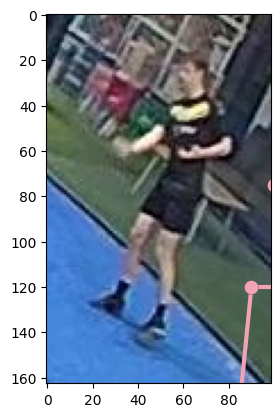

In [9]:
import cv2
import matplotlib.pyplot as plt 
# annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
I = cv2.imread("dataset_esprit_24_02/images/default/frame_10200_crop_1.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(I); 

# annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(1)
coco.showAnns(anns)